# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 9/11/19 @ 11 AM
* Instructor name: Victor
* Blog post URL:


# Questions to ask

1. What are the drawbacks of using IterativeImputer?

2. What are the top 3 features you could use to predict a price based on this model?

3. What is the worst feature in predicting price?

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#puts the CSV file into a pandas dataframe for viewing and manipulation
df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- A few features have missing values. 

- I can get rid of the id as long as there are not duplicates.

- For this project i also won't be using the date.

- Need to get everything in the right datatype.

# Cleaning the Data

## Check for duplicates

In [4]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value since the rest of the listing information is different


## Changing the column type to be something that makes sense

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [10]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
2600.0        1
2610.0        1
276.0         1
274.0         1
1245.0        1
143.0         1
266.0         1
862.0         1
2180.0        1
415.0         1
243.0         1
1135.0        1
1525.0        1
3000.0        1
172.0         1
225.0         1
518.0         1
935.0         1
1920.0        1
1930.0        1
1990.0        1
588.0         1
1548.0        1
2390.0        1
602.0         1
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Len

In [7]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of '?' used. First I will change these to 0 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?', 0)

df.sqft_basement = df.sqft_basement.astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [9]:
#drop the date and id columns
df = df.drop(columns = ['id','date'])

## Using IterativeImputer to impute missing values


While I could have gone through and changed any NaN values to 0 or something else on my own I thought for this project it would be more benificial to my learning to use a function that others recommend is better than just filling the median/mean. While I know this may bias my data and in the end the model may be a little off I wanted to try it. 

IterativeImputer is a multivariate imputer that estimates each feature from all the others. It models each feature with missing values as a functIon of other features in a round-robin fashion. 

In [11]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df)
imputed_df = imp.transform(df)
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,-0.00443,0.0,3.0,7.0,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.00000,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.000000,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.00000,0.0,3.0,6.0,770.0,0.0,1933.0,131.686768,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.00000,0.0,5.0,7.0,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.00000,0.0,3.0,8.0,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


In [12]:
imputed_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
imputed_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007640,0.234330,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.784332,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.082933,0.765843,0.650546,1.173200,827.759761,439.819830,29.375234,367.769172,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,-0.083039,-0.190361,1.000000,3.000000,370.000000,0.000000,1900.000000,-267.361064,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,6.109648,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_built         21597 non-null float64
yr_renovated     21597 non-null float64
zipcode          21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: float64(19)
memory usage: 3.1 MB


### Set all values of waterfront that are not 1 to 0

In [16]:
imputed_df.loc[imputed_df.waterfront < 1, 'waterfront'] = 0

In [17]:
imputed_df.waterfront.describe()

count    21597.000000
mean         0.006760
std          0.081944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

### Edit yr_renovated so that any values below 1975 are 0 and all other values are 1 for renovated

I decided that for renovations, the year isn't as important as maybe rather it had been renovated at all. Another option I tried was setting any yr_renovated that was 0 to the year it was built. However this made yr_renovated and yr_built very colinear so one would have to be removed anyways. 

In [18]:
imputed_df.yr_renovated = imputed_df.yr_renovated.astype('int64')

In [19]:
imputed_df.loc[imputed_df.yr_renovated < 1975, 'yr_renovated'] = 0
imputed_df.loc[imputed_df.yr_renovated != 0, 'yr_renovated'] = 1

In [20]:
imputed_df.yr_renovated.describe()

count    21597.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yr_renovated, dtype: float64

### Set any value of view less than 0 to 0 or greater than 4 to 4

In [21]:
#round views
imputed_df.view = imputed_df.view.round()

In [22]:
#limit view to a max value of 4
imputed_df.loc[imputed_df.view > 4, 'view'] = 4

In [23]:
imputed_df.view.describe()

count    21597.000000
mean         0.234060
std          0.765403
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [24]:
imputed_df.view.value_counts()

0.0    19470
2.0      958
3.0      508
1.0      343
4.0      318
Name: view, dtype: int64

### Check sqft_basement

In [25]:
imputed_df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [26]:
#set any negative values to 0 for no basement
imputed_df.loc[imputed_df.sqft_basement < 0, 'sqft_basement'] = 0

## Limit price to 1 Million


In [29]:
imputed_df.drop(imputed_df[imputed_df.price > 1000000].index, inplace = True)

I decided to limit the price to 1 million to get rid of a lot of outliers. Depending on who you are modeling for a lot of houses are way out of people's price ranges. Limiting it to 1 million seemed like a fair compromise. 

## Look at data

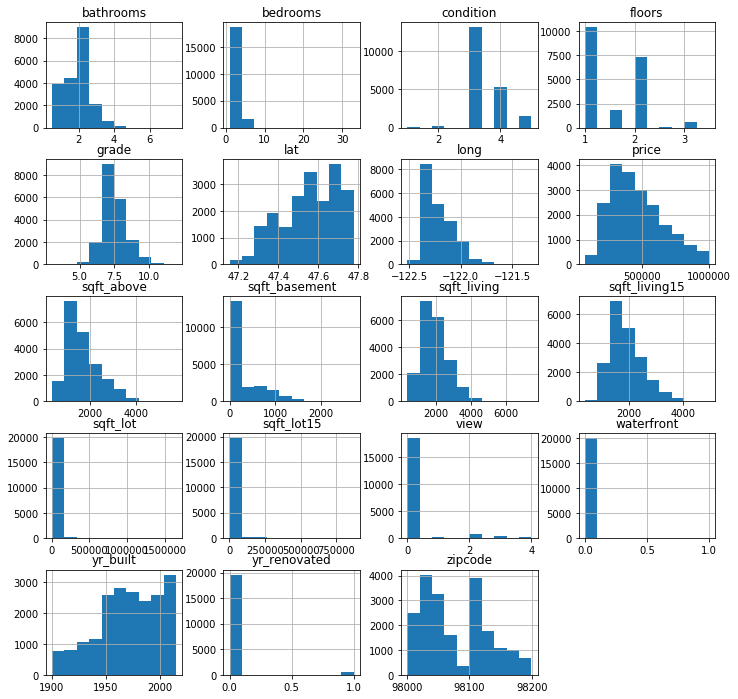

In [30]:
imputed_df.hist(figsize=(12,12));

### Look at distribution of prices


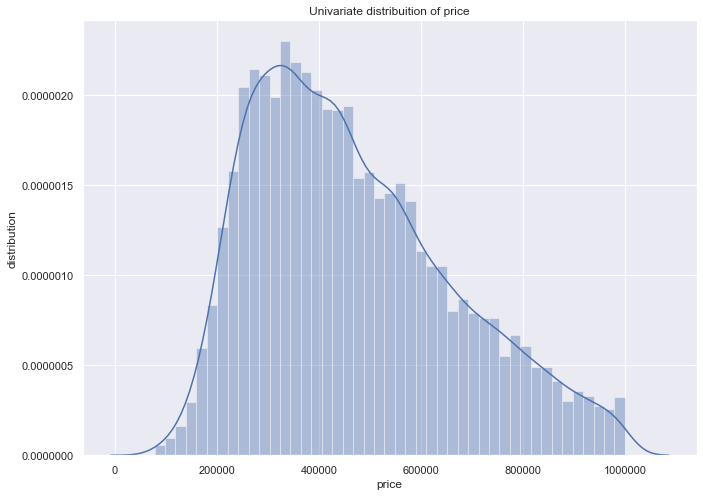

In [31]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.distplot(imputed_df['price'])
plt.xlabel('price')
plt.ylabel('distribution')
plt.title('Univariate distribuition of price')
plt.show()

As you can see from the above graph. Limiting the price to 1 million normalizes the data better with the left side being heavier still. 

### Limit Sqft_Lot to and Sqft_Lot15 to 50000 to limit outliers with massive lots but in cheaper areas

In [32]:
test_df = imputed_df.copy()

In [33]:
imputed_df.drop(imputed_df[imputed_df.sqft_lot > 50000].index, inplace = True)
imputed_df.drop(imputed_df[imputed_df.sqft_lot15 > 50000].index, inplace = True)

In [34]:
imputed_df.drop(imputed_df[imputed_df.bedrooms > 20].index, inplace = True)

In [35]:
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0,98074.0,47.6168,-122.045,1800.0,7503.0


### Limit the size of the houses to 6,000 sqft

In [36]:
imputed_df.drop(imputed_df[imputed_df.sqft_living > 6000].index, inplace = True)

## Using Seaborn Pairplot to see each scatterplot with a regression line

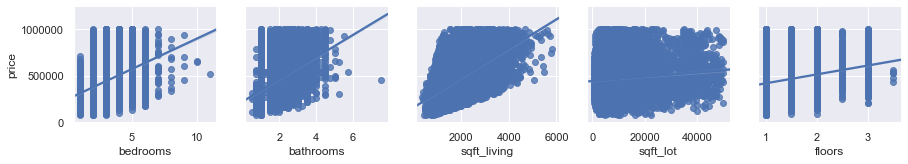

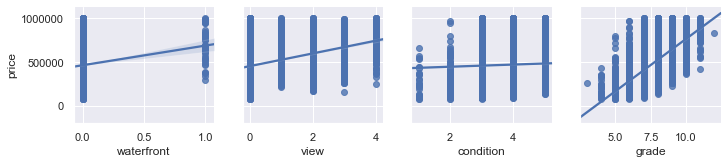

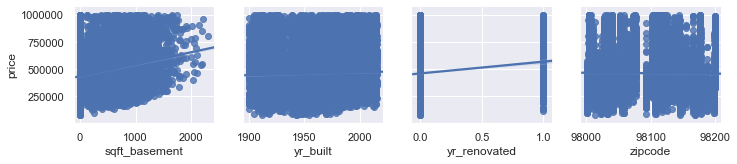

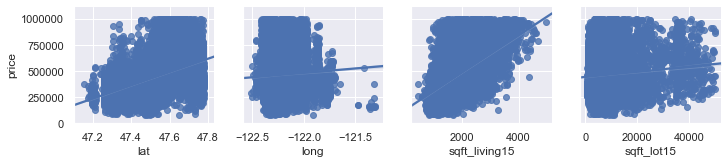

In [37]:
sns.pairplot(imputed_df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['waterfront', 'view', 'condition', 'grade'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price', kind='reg');

- There seem to be a few categorical variables
    -floors
    -waterfront
    -view
    -condition
    -grade
    -yr_renovated
 

## A Model Using Raw Features

In [38]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in imputed_df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=imputed_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2464.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:            -2.5016e+05
No. Observations:               19236   AIC:                         5.004e+05
Df Residuals:                   19217   BIC:                         5.005e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.024e+06   1.66e+06     -1.220      0.223   -5.28e+06    1.23e+06
bedrooms      -9258.3396   1163.053     -7.960      0.000   -1.15e+04   -6978.653
bathrooms       2.05e+04   1927.772     10.636      0.000    1.67e+04    2.43e+04
sqft_living      61.9289     11.091      5.584      0.000      40.190      83.668
sqft_lot         -0.5081      0.230     -2.211      0.027      -0.958      -0.058
floors          2.72e+04   2145.299     12.678      0.000     2.3e+04    3.14e+04
waterfront     1.789e+05   1.82e+04      9.802      0.000    1.43e+05    2.15e+05
view           2.795e+04   1419.561     19.692      0.000    2.52e+04    3.07e+04
condition      2.618e+04   1337.881     19.570      0.000    2.36e+04    2.88e+04
grade           7.11e+04   1292.007     55.031      0.000    6.86e+04    7.36e+04
sqft_above       11.0606     11.065      1.000      0.318     -10.628      32.749
sqft_basement     8.3814     10.968      0.764      0.445     -13.117      29.880
yr_built      -1833.3907     41.696    -43.971      0.000   -1915.118   -1751.664
yr_renovated   3.857e+04   5098.620      7.565      0.000    2.86e+04    4.86e+04
zipcode        -225.9391     18.610    -12.141      0.000    -262.416    -189.462
lat            5.453e+05   6025.892     90.491      0.000    5.33e+05    5.57e+05
long          -1.169e+04   7685.084     -1.521      0.128   -2.68e+04    3371.863
sqft_living15    52.9759      2.230     23.755      0.000      48.605      57.347
sqft_lot15       -1.7884      0.256     -6.980      0.000      -2.291      -1.286
==============================================================================
Omnibus:                     1104.047   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1754.889
Skew:                           0.479   Prob(JB):                         0.00
Kurtosis:                       4.128   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations
The first model here uses all of the features unaltered. This way I would be able to see any change when I run the model later. 
The model starts off with a relatively high Adjusted R-Squared of 0.7 so it will be interesting to see if it finishes higher or lower. 

## Test for Colinearity

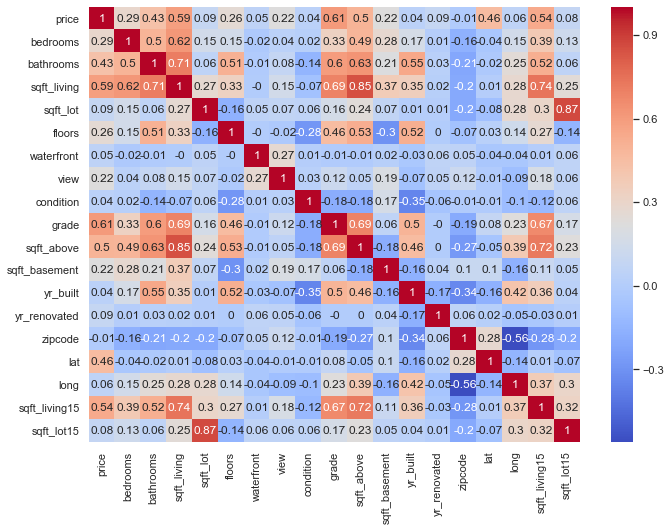

In [39]:
correlation_matrix = imputed_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

### Observations of Heat Map
It is easy to quickly glance and see what features are going to affect price the most:
 - grade, bathrooms, sqft_living, latitude, and sqft_living15

In [40]:
abs(imputed_df.corr())  > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Sqft_living has a high colinearity with sqft_above. Since they both seem to have the same information I will just drop sqft_above.
Sqft_lot has a high colinearity with sqft_lot15. 

In [41]:
imputed_df = imputed_df.drop(columns = ['sqft_above', 'sqft_lot15'])

## Ploting Grade, Sqft_living, Sqft_living15


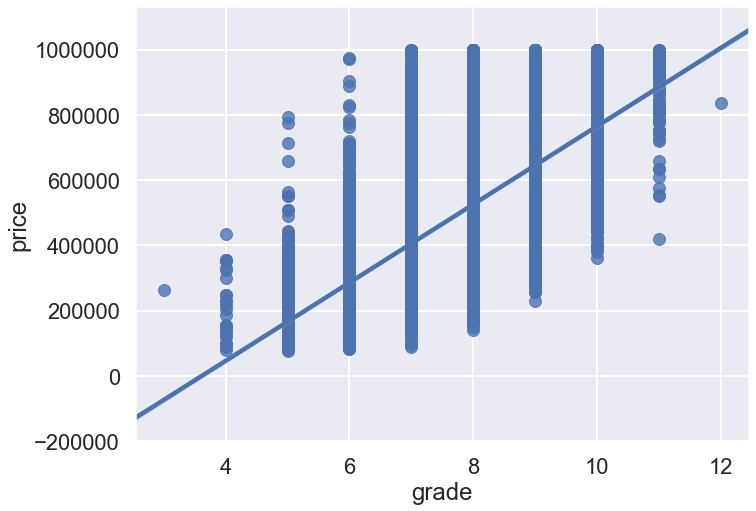

In [42]:
sns.set_context('poster')
sns.regplot(x=imputed_df.grade, y=imputed_df.price, data=imputed_df);

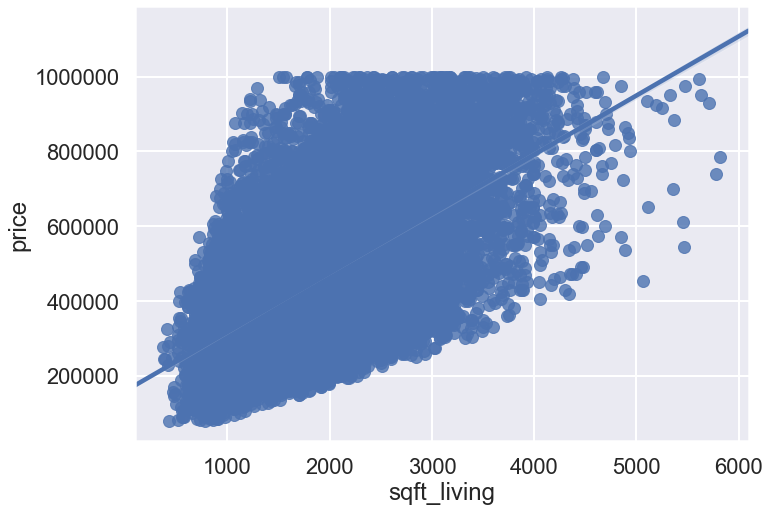

In [43]:
sns.regplot(x=imputed_df.sqft_living, y=imputed_df.price, data=imputed_df);

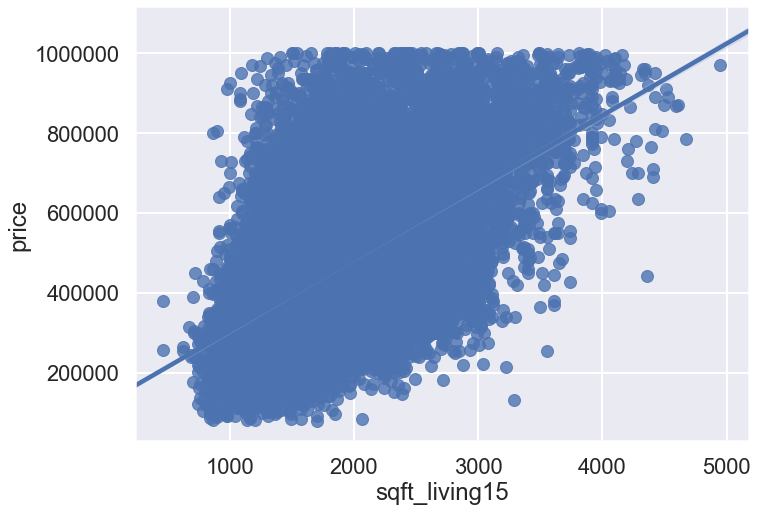

In [44]:
sns.regplot(x=imputed_df.sqft_living15, y=imputed_df.price, data=imputed_df);

In [45]:
sns.set_context('paper')

### Why plot these 3?

From the heat map and colinearity visual you can see that these three features have the highest colinearity with price. I wanted to have a better visual with these three since I think they will be more important than other features.

## Deal with Categorical Variables

### For categorical variables, if they are floats they will produce an odd column name

- View, waterfront, and condition are all integer values so I will change their datatype to int

- For floors, I will just drop and run the data

In [46]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19236 entries, 0 to 21596
Data columns (total 17 columns):
price            19236 non-null float64
bedrooms         19236 non-null float64
bathrooms        19236 non-null float64
sqft_living      19236 non-null float64
sqft_lot         19236 non-null float64
floors           19236 non-null float64
waterfront       19236 non-null float64
view             19236 non-null float64
condition        19236 non-null float64
grade            19236 non-null float64
sqft_basement    19236 non-null float64
yr_built         19236 non-null float64
yr_renovated     19236 non-null int64
zipcode          19236 non-null float64
lat              19236 non-null float64
long             19236 non-null float64
sqft_living15    19236 non-null float64
dtypes: float64(16), int64(1)
memory usage: 2.6 MB


In [47]:
#change condition to int64
imputed_df.condition = imputed_df.condition.astype('int64')

In [48]:
#change view to int64
imputed_df.view = imputed_df.view.astype('int64')

In [49]:
#change bedrooms to int64
imputed_df.bedrooms = imputed_df.bedrooms.astype('int64')

In [50]:
#I rounded floors to get rid of the float values instead of losing the extra floor.
imputed_df.floors = imputed_df.floors.round()
imputed_df.floors = imputed_df.floors.astype('int64')

In [51]:
#change grade to int64
imputed_df.grade = imputed_df.grade.astype('int64')

In [52]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19236 entries, 0 to 21596
Data columns (total 17 columns):
price            19236 non-null float64
bedrooms         19236 non-null int64
bathrooms        19236 non-null float64
sqft_living      19236 non-null float64
sqft_lot         19236 non-null float64
floors           19236 non-null int64
waterfront       19236 non-null float64
view             19236 non-null int64
condition        19236 non-null int64
grade            19236 non-null int64
sqft_basement    19236 non-null float64
yr_built         19236 non-null float64
yr_renovated     19236 non-null int64
zipcode          19236 non-null float64
lat              19236 non-null float64
long             19236 non-null float64
sqft_living15    19236 non-null float64
dtypes: float64(11), int64(6)
memory usage: 2.6 MB


In [53]:
floor_dummies = pd.get_dummies(imputed_df['floors'], prefix='flr', 
                                   drop_first=True)
view_dummies = pd.get_dummies(imputed_df['view'], prefix='view', 
                                   drop_first=True)
grade_dummies =  pd.get_dummies(imputed_df['grade'], prefix='grade', 
                                 drop_first=True)
condition_dummies = pd.get_dummies(imputed_df['condition'], prefix='cond', 
                                   drop_first=True)
bedroom_dummies = pd.get_dummies(imputed_df['bedrooms'], prefix='bdrm', 
                                   drop_first=True)

# I went back to just having the dataframe called df for simplicity going on
df = imputed_df.copy()

In [54]:
#Remove old variables columns
df = df.drop(['bedrooms', 'floors', 'view', 'grade',
                     'condition'], axis=1)

In [55]:
#Add new dummy columns
df = pd.concat([df, floor_dummies, bedroom_dummies, 
               view_dummies, condition_dummies, grade_dummies], axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19236 entries, 0 to 21596
Data columns (total 42 columns):
price            19236 non-null float64
bathrooms        19236 non-null float64
sqft_living      19236 non-null float64
sqft_lot         19236 non-null float64
waterfront       19236 non-null float64
sqft_basement    19236 non-null float64
yr_built         19236 non-null float64
yr_renovated     19236 non-null int64
zipcode          19236 non-null float64
lat              19236 non-null float64
long             19236 non-null float64
sqft_living15    19236 non-null float64
flr_2            19236 non-null uint8
flr_3            19236 non-null uint8
flr_4            19236 non-null uint8
bdrm_2           19236 non-null uint8
bdrm_3           19236 non-null uint8
bdrm_4           19236 non-null uint8
bdrm_5           19236 non-null uint8
bdrm_6           19236 non-null uint8
bdrm_7           19236 non-null uint8
bdrm_8           19236 non-null uint8
bdrm_9           19236 non-null u

## Apply Log Transform to Non-Normal Features


Log transforms can further normalize the data as can be seen by the following graphs

In [57]:
to_log = ['sqft_living', 'sqft_lot', 'yr_built',
              'sqft_living15']
df_log = pd.DataFrame([])
for feat in to_log:
    df[feat] = df[feat].map(lambda x: np.log(x) if x > 1 else 0)
    df_log[feat] = df[feat]

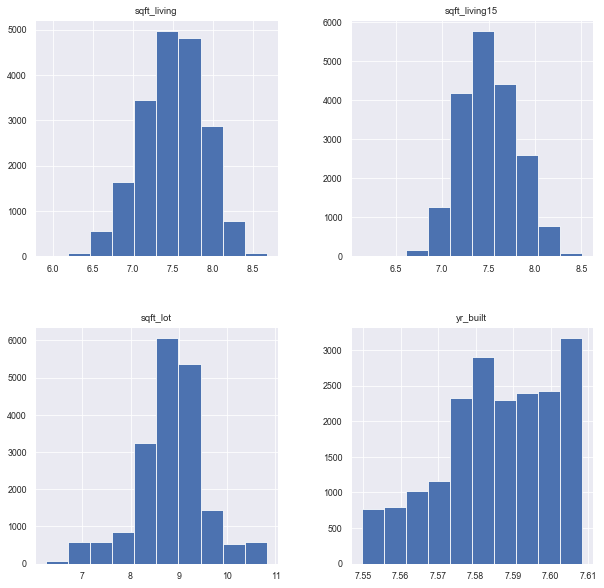

In [58]:
df_log.hist(figsize=(10,10));

## Apply Min-Max Scaling

Min-max scaling puts all values between 0 and 1 to more easily compare without units

In [59]:
to_scale = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built',
              'bathrooms', 'sqft_living15', 'lat', 'long', 'zipcode']
    
df_scaled = pd.DataFrame([])
for feat in to_scale:
    scaled = df[feat]
    df[feat] = (scaled-min(scaled))/(max(scaled)-min(scaled))
    df_scaled[feat] = df[feat]

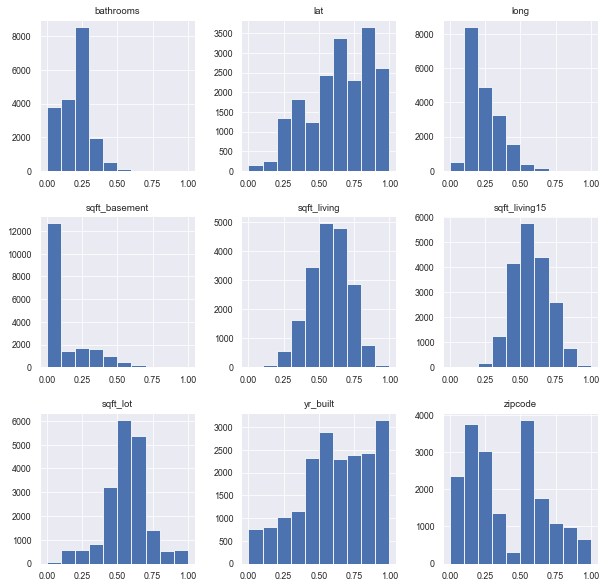

In [60]:
df_scaled.hist(figsize=(10,10));

In [61]:
df.head()

,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,cond_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,221900.0,0.071429,0.420884,0.522637,0.0,0.000000,0.485598,0,0.893939,0.571498,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.250000,0.703365,0.577022,0.0,0.173913,0.450745,1,0.626263,0.908959,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,0.071429,0.265968,0.647717,0.0,0.000000,0.293018,0,0.136364,0.936143,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,0.357143,0.605032,0.495862,0.0,0.395652,0.572419,0,0.681818,0.586939,...,1,0,0,0,1,0,0,0,0,0
4,510000.0,0.214286,0.549090,0.601011,0.0,0.000000,0.761879,0,0.368687,0.741354,...,0,0,0,0,0,1,0,0,0,0


In [62]:
df.describe()

,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,cond_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
count,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,...,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000,19236.000000
mean,464062.796683,0.218517,0.573039,0.566156,0.001975,0.111476,0.617070,0.026045,0.399294,0.647865,...,0.076211,0.001300,0.011437,0.101944,0.450925,0.292836,0.106155,0.031244,0.004055,0.000052
std,195628.237476,0.099815,0.140890,0.152702,0.044403,0.172366,0.254486,0.159273,0.271396,0.225202,...,0.265343,0.036028,0.106333,0.302583,0.497599,0.455076,0.308044,0.173980,0.063550,0.007210
min,78000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,310000.000000,0.142857,0.477703,0.495862,0.000000,0.000000,0.450745,0.000000,0.161616,0.498472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,429950.000000,0.214286,0.578138,0.579280,0.000000,0.000000,0.641558,0.000000,0.358586,0.662699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,588000.000000,0.285714,0.675492,0.642732,0.000000,0.217391,0.838782,0.000000,0.590909,0.844298,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Run Model

In [63]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [64]:
model = ols(formula=formula, data=df).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1102.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:57:18   Log-Likelihood:            -2.5002e+05
No. Observations:               19236   AIC:                         5.001e+05
Df Residuals:                   19194   BIC:                         5.005e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.005e+05   1.09e+05      0.920      0.358   -1.14e+05    3.15e+05
bathrooms      1.318e+05   1.36e+04      9.691      0.000    1.05e+05    1.58e+05
sqft_living    4.121e+05   1.35e+04     30.630      0.000    3.86e+05    4.38e+05
sqft_lot      -1.497e+05   7093.696    -21.104      0.000   -1.64e+05   -1.36e+05
waterfront     1.607e+05   1.98e+04      8.119      0.000    1.22e+05    1.99e+05
sqft_basement -1.952e+04   6464.752     -3.020      0.003   -3.22e+04   -6850.388
yr_built      -2.072e+05   4915.960    -42.144      0.000   -2.17e+05   -1.98e+05
yr_renovated   4.089e+04   5087.116      8.038      0.000    3.09e+04    5.09e+04
zipcode       -4.832e+04   3702.900    -13.050      0.000   -5.56e+04   -4.11e+04
lat            3.351e+05   3779.017     88.670      0.000    3.28e+05    3.42e+05
long           -152.9872   9237.047     -0.017      0.987   -1.83e+04     1.8e+04
sqft_living15  2.275e+05      1e+04     22.719      0.000    2.08e+05    2.47e+05
flr_2          9856.1288   2305.220      4.276      0.000    5337.696    1.44e+04
flr_3          1.604e+04   5655.776      2.836      0.005    4956.574    2.71e+04
flr_4          2.566e+04   4.38e+04      0.585      0.558   -6.02e+04    1.12e+05
bdrm_2         -221.6332   8494.776     -0.026      0.979   -1.69e+04    1.64e+04
bdrm_3        -1.858e+04   8570.873     -2.168      0.030   -3.54e+04   -1783.550
bdrm_4        -2.256e+04   8825.885     -2.556      0.011   -3.99e+04   -5260.505
bdrm_5        -2.439e+04   9365.613     -2.605      0.009   -4.28e+04   -6035.971
bdrm_6        -2.335e+04   1.17e+04     -1.997      0.046   -4.63e+04    -434.383
bdrm_7         -3.93e+04   2.19e+04     -1.791      0.073   -8.23e+04    3700.181
bdrm_8        -1.208e+04   3.69e+04     -0.327      0.743   -8.44e+04    6.02e+04
bdrm_9         -386.7134   5.45e+04     -0.007      0.994   -1.07e+05    1.06e+05
bdrm_10        2970.5553   7.62e+04      0.039      0.969   -1.46e+05    1.52e+05
bdrm_11       -1.137e+05   1.07e+05     -1.058      0.290   -3.24e+05    9.69e+04
view_1          7.14e+04   6764.881     10.555      0.000    5.81e+04    8.47e+04
view_2         5.961e+04   4234.803     14.075      0.000    5.13e+04    6.79e+04
view_3         6.543e+04   6605.354      9.906      0.000    5.25e+04    7.84e+04
view_4         1.401e+05   1.15e+04     12.183      0.000    1.18e+05    1.63e+05
cond_2         5.363e+04   2.32e+04      2.307      0.021    8061.274    9.92e+04
cond_3         7.061e+04   2.16e+04      3.268      0.001    2.83e+04    1.13e+05
cond_4         9.679e+04   2.16e+04      4.479      0.000    5.44e+04    1.39e+05
cond_5         1.229e+05   2.17e+04      5.654      0.000    8.03e+04    1.66e+05
grade_4       -1.819e+05   1.09e+05     -1.665      0.096   -3.96e+05    3.22e+04
grade_5       -2.031e+05   1.07e+05     -1.889   

### Observations of newest model
1. Adjusted R-Squared went up
2. Skew and Kurtosis both marginally went down

## Feature Scaling

### Stepwise Selection

The following function will limit any feature so that they will all be below the 0.05 p-value threshold.

In [66]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [67]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)

Add  grade_10                       with p-value 0.0


C:\Users\Andy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade_7                        with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade_9                        with p-value 3.06325e-212
Add  yr_built                       with p-value 3.82574e-253
Add  grade_6                        with p-value 7.68885e-282
Add  sqft_living15                  with p-value 6.42065e-106
Add  sqft_lot                       with p-value 3.15639e-155
Add  grade_11                       with p-value 7.01464e-75
Add  grade_8                        with p-value 2.28301e-69
Drop grade_6                        with p-value 0.220878


C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  view_4                         with p-value 4.96246e-59
Add  cond_3                         with p-value 7.4971e-57
Add  bathrooms                      with p-value 1.95849e-33
Add  view_2                         with p-value 2.87534e-31
Add  zipcode                        with p-value 2.69366e-35
Add  view_1                         with p-value 1.95309e-22
Add  view_3                         with p-value 6.19156e-24
Add  waterfront                     with p-value 2.55919e-18
Add  cond_5                         with p-value 6.8018e-16
Add  yr_renovated                   with p-value 8.81298e-17
Add  bdrm_2                         with p-value 4.0316e-10
Add  sqft_basement                  with p-value 1.14174e-09
Add  cond_4                         with p-value 7.54551e-10
Add  grade_12                       with p-value 1.64122e-05
Add  flr_2                          with p-value 0.000836478
Add  grade_5                        with p-value 0.00215344
Add  flr_3                  

In [68]:
outcome = 'price'
predictors = result
pred_sum = "+".join(predictors)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1672.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:59:13   Log-Likelihood:            -2.5003e+05
No. Observations:               19236   AIC:                         5.001e+05
Df Residuals:                   19208   BIC:                         5.003e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.493e+04   1.08e+04     -4.177      0.000    -6.6e+04   -2.38e+04
grade_10       3.027e+05   6260.206     48.359      0.000     2.9e+05    3.15e+05
grade_7        4.556e+04   2975.507     15.311      0.000    3.97e+04    5.14e+04
sqft_living    3.979e+05   1.26e+04     31.528      0.000    3.73e+05    4.23e+05
lat            3.351e+05   3757.088     89.187      0.000    3.28e+05    3.42e+05
grade_9        2.259e+05   4678.184     48.295      0.000    2.17e+05    2.35e+05
yr_built      -2.064e+05   4703.667    -43.890      0.000   -2.16e+05   -1.97e+05
sqft_living15  2.285e+05   9913.678     23.047      0.000    2.09e+05    2.48e+05
sqft_lot      -1.504e+05   6938.418    -21.670      0.000   -1.64e+05   -1.37e+05
grade_11       3.627e+05   1.31e+04     27.709      0.000    3.37e+05    3.88e+05
grade_8        1.174e+05   3643.578     32.218      0.000     1.1e+05    1.25e+05
view_4         1.404e+05   1.15e+04     12.220      0.000    1.18e+05    1.63e+05
cond_3         2.432e+04   8363.304      2.907      0.004    7922.208    4.07e+04
bathrooms      1.293e+05   1.34e+04      9.668      0.000    1.03e+05    1.56e+05
view_2         5.998e+04   4231.380     14.174      0.000    5.17e+04    6.83e+04
zipcode       -4.831e+04   3377.661    -14.302      0.000   -5.49e+04   -4.17e+04
view_1         7.149e+04   6754.407     10.584      0.000    5.82e+04    8.47e+04
view_3         6.616e+04   6598.420     10.027      0.000    5.32e+04    7.91e+04
waterfront     1.605e+05   1.98e+04      8.114      0.000    1.22e+05    1.99e+05
cond_5         7.656e+04   8730.451      8.769      0.000    5.94e+04    9.37e+04
yr_renovated   4.119e+04   5074.592      8.117      0.000    3.12e+04    5.11e+04
bdrm_2         1.755e+04   2624.834      6.685      0.000    1.24e+04    2.27e+04
sqft_basement -1.885e+04   6382.683     -2.954      0.003   -3.14e+04   -6343.210
cond_4         5.039e+04   8394.563      6.003      0.000    3.39e+04    6.68e+04
grade_12       4.625e+05   1.07e+05      4.318      0.000    2.53e+05    6.73e+05
flr_2          9756.3352   2292.472      4.256      0.000    5262.890    1.42e+04
grade_5       -2.395e+04   7668.415     -3.124      0.002    -3.9e+04   -8923.994
flr_3          1.609e+04   5627.983      2.859      0.004    5059.250    2.71e+04
==============================================================================
Omnibus:                     1086.364   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1745.159
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       4.138   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

## Model Observations:
1. The intercept went down
2. Adjusted R-squared, kurtosis, and skew did not really change
3. Overall not a big change from the model with all of the features

# Model Validation


In [69]:
y = df[['price']]
X = df[result]

In [70]:
#split test size by 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15388 3848 15388 3848


In [72]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(X.columns, linreg.coef_)

[-55043.64226965]
[[ 3.05956669e+05  4.53869815e+04  4.05142294e+05  3.30614129e+05
   2.28727111e+05 -2.06384829e+05  2.25527801e+05 -1.51969854e+05
   3.55631245e+05  1.17477335e+05  1.40200023e+05  3.79684426e+04
   1.16345985e+05  5.38185819e+04 -4.61535802e+04  7.62418584e+04
   6.25338843e+04  1.51353018e+05  8.94861023e+04  3.53394978e+04
   1.88077219e+04 -1.71492201e+04  6.30707153e+04 -1.60071068e-10
   9.12713225e+03 -1.68602791e+04  1.76392425e+04]]


In [73]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [74]:
train_residuals = y_hat_train - y_train
print(train_residuals)
test_residuals = y_hat_test - y_test
print(test_residuals)

               price
18645  -53696.740745
18368   -2458.138123
3971   143346.778576
20419   67697.864603
11363    1970.448116
4562    24784.681829
6311   -28880.241036
16751   53297.647426
8450    86433.551481
14116  -15611.927558
7308    57347.150256
15163   67199.533397
3153  -288433.236297
13294   14086.139218
16988 -188451.810387
16064   59930.082732
10940  -76516.170326
20188   41149.655414
17437   62254.082365
3693  -137566.499275
12341  -31187.012801
18170   -8231.171268
8747    43100.336743
4771    93586.371766
5520   -26493.308790
14708 -101102.361952
5590   -34770.624948
21039   50065.272721
14750   33755.750028
8889    71523.723912
...              ...
4353  -282856.436975
3428    44504.625290
1506   184463.204116
14198   -3717.241093
8908   129661.642518
8195   145476.186518
10702   -4671.392075
12860   89975.588040
7516     3089.190992
3016   -60113.110770
16247  -41748.236333
13731  243246.521474
3542   143407.276385
14596   27557.862880
2842    28389.142932
13668  -69757

In [75]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 11331796285.224173
Test Mean Squarred Error: 11869425149.876762


# Conclusions

This does not feel like the best model for the data set. However this was the lowest MSE I found for both the Train and Test data sets. Perhaps there is a combination of features that could lower the error. Limiting the price further may make the model predict better too. However I wanted to use as much of the data as I could for this project and only remove features with high colinearities between each other. I probably could have binned more features or reworked categorical variables but I felt I had put enough hours into playing with other parts. 

The IterativeImputer may also have played a role in such a high MSE. It was a challenge to make it fit with the data. I was given negative numbers and decimals in places I did not want them. There may be a better way to approach IterativeImputer but I wanted something that would further my knowledge of python and statistics instead of just filling in 0's or random numbers, etc. I feel like it worked out for the most part even if I had to manually fix a few things here and there. Overall I learned something and I think that is the goal in the end. 

Grade, sqft_living, and sqft_living15 had the highest coefficients in the models. From what I can deduce they will have the highest impact on the final selling point of a house. While zipcodes in their raw form would have the least impact. Given unlimited time it would be nice to group houses by zipcode and see the variations between zip codes. Another interesting feature may have been different political zones to see if there is gerrymandering or other things like that. Maybe another project some day. 